# Did you like the movie? - Multiple Linear Regression

In this stage we will perform a multiple linear regression analysis in order to predict a movie's fan rating based on all the information we have about the movie.  We will use the `statsmodels` approach, both with and without considering an intercept.

## Import libraries

As usual, we load the libraries we need and configure our plots.

In [72]:
# Data wrangling
# ==============================================================================
import pandas as pd
import numpy as np

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocessing and modeling
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

# Configuring matplotlib
# ==============================================================================
#plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
#style.use('ggplot') or plt.style.use('ggplot')

# Configuring warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

We load here our clean dataset

In [73]:
movies = pd.read_csv(r'C:\Users\alana\Documents\TecMTY\8vo_semestre\Data_Science\movie_project\datasets\movie_DB3_clean.csv', index_col='Title')
movies.head()

,Genre,Year,Duration,Budget,Revenue,Imdb,Personalrating,Critic_1,Critic_2,Critic_3,Critic_4,Fans
Title,,,,,,,,,,,,
A quiet place,Horror,2018,90.0,17.0,340.939361,75.0,70.0,70.0,90.0,80.0,8.0,77.5
A quiet place Part II,Horror,2020,97.0,55.0,297.400000,72.0,70.0,80.0,40.0,60.0,6.0,69.0
Aladin (2019),Fantasy,2019,128.0,183.0,1050.693953,69.0,90.0,50.0,70.0,40.0,4.0,81.5
Alice in Wonderland,Fantasy,2010,108.0,205.0,1028.467110,64.0,80.0,40.0,60.0,50.0,7.0,78.0
American Psycho,Horror,2000,101.0,7.0,34.300000,76.0,80.0,60.0,50.0,80.0,7.0,83.5


In [74]:
movies.describe()

,Year,Duration,Budget,Revenue,Imdb,Personalrating,Critic_1,Critic_2,Critic_3,Critic_4,Fans
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,2010.119760,114.922156,91.943078,469.075315,71.868263,85.808383,68.922156,67.485030,66.886228,6.874251,74.401198
std,12.244892,23.406053,69.063796,359.675748,8.393594,11.889519,17.970187,18.423354,17.177465,1.606387,14.065064
min,1942.000000,70.000000,0.636000,0.621392,51.000000,50.000000,30.000000,20.000000,30.000000,4.000000,37.000000
25%,2005.500000,97.000000,25.000000,188.160956,67.000000,80.000000,60.000000,60.000000,60.000000,6.000000,66.500000
50%,2013.000000,109.000000,85.000000,383.200000,73.000000,90.000000,70.000000,60.000000,60.000000,7.000000,76.500000
75%,2018.000000,130.000000,150.000000,701.750000,77.000000,100.000000,80.000000,80.000000,80.000000,8.000000,86.000000
max,2023.000000,180.000000,291.000000,1516.045911,92.000000,100.000000,100.000000,100.000000,100.000000,10.000000,96.000000


## Relations between variables

The first step in developing a multiple linear model is to study the relationship that exists between the different variables. This information is very useful when identifying which are the best predictors for the model, and for detecting collinearity between predictors.

In [75]:
corr_matrix = movies.select_dtypes(include=['float64', 'int']).corr(method='pearson')
corr_matrix

,Year,Duration,Budget,Revenue,Imdb,Personalrating,Critic_1,Critic_2,Critic_3,Critic_4,Fans
Year,1.000000,0.271848,0.240320,0.101848,-0.235057,-0.248525,-0.231292,-0.251539,-0.140845,-0.220960,-0.203538
Duration,0.271848,1.000000,0.246109,0.265925,0.314489,0.090388,0.113804,0.033490,0.138587,0.034826,0.152954
Budget,0.240320,0.246109,1.000000,0.681190,0.036448,0.168053,-0.145170,-0.052864,-0.112467,-0.044417,0.124077
Revenue,0.101848,0.265925,0.681190,1.000000,0.235804,0.210663,0.081284,0.119742,0.016870,0.106019,0.217491
Imdb,-0.235057,0.314489,0.036448,0.235804,1.000000,0.349979,0.446364,0.462201,0.523168,0.492009,0.716592
Personalrating,-0.248525,0.090388,0.168053,0.210663,0.349979,1.000000,0.139440,0.207349,0.153982,0.155175,0.310553
Critic_1,-0.231292,0.113804,-0.145170,0.081284,0.446364,0.139440,1.000000,0.412085,0.476950,0.429339,0.399988
Critic_2,-0.251539,0.033490,-0.052864,0.119742,0.462201,0.207349,0.412085,1.000000,0.369140,0.463523,0.441324
Critic_3,-0.140845,0.138587,-0.112467,0.016870,0.523168,0.153982,0.476950,0.369140,1.000000,0.483482,0.552253
Critic_4,-0.220960,0.034826,-0.044417,0.106019,0.492009,0.155175,0.429339,0.463523,0.483482,1.000000,0.478704


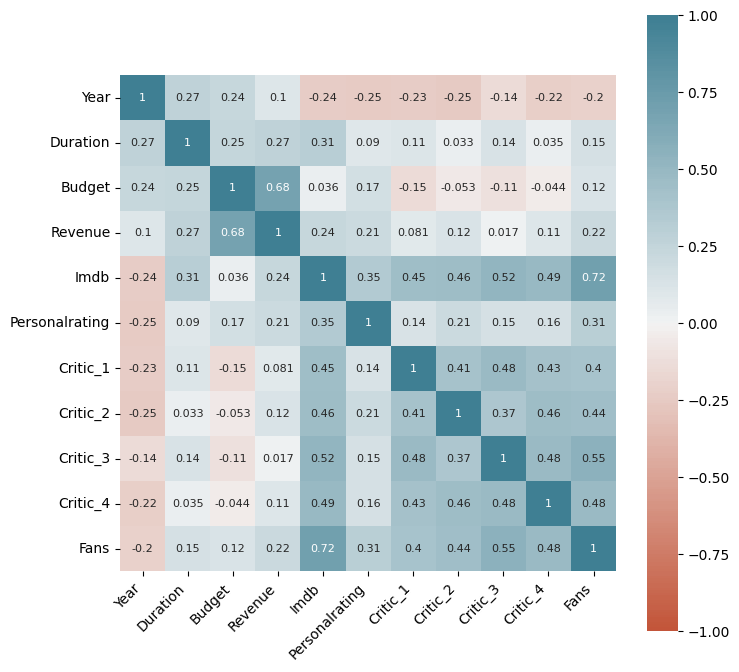

In [76]:
# Heatmap for correlation matrix
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sns.heatmap(
    corr_matrix,
    annot     = corr_matrix,
    cbar      = True,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220,n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

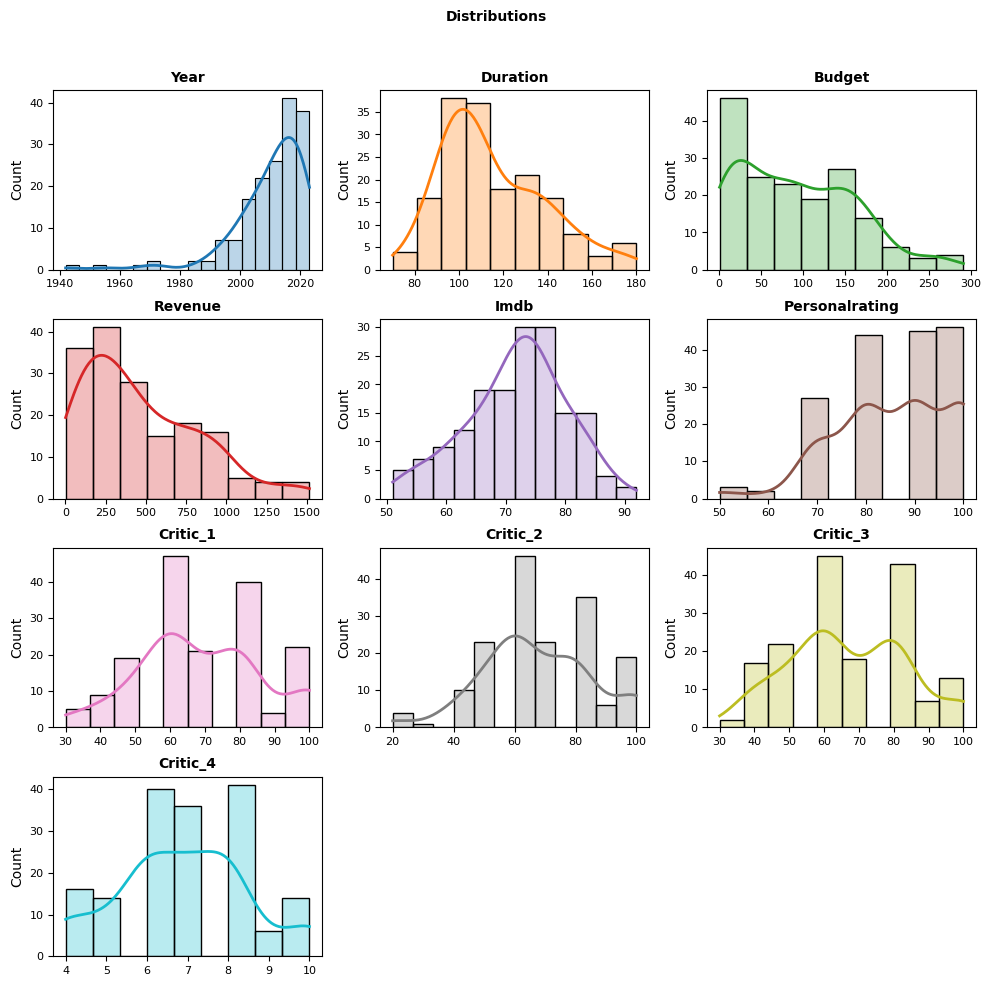

In [77]:
# Distribution plots for each numerical variable
# ==============================================================================
# 
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))
axes = axes.flat
columnas_numeric = movies.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = movies,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


fig.delaxes(axes[10])
fig.delaxes(axes[11])
fig.tight_layout(pad=1)
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distributions', fontsize = 10, fontweight = "bold")

## Model fitting

We will fit a linear regression model with `Fans` as the response variable, and all the other variables as predictors. To this end, we will split the data in two groups, a training set and a testing set. We will use the **Statsmodels** library. **Statsmodels** provides two ways of training the model:

- Giving a formula for the model and feeding it with a `DataFrame` for the training test that includes the response variable and the predictors. This is similar to the method used in **R**.

- Giving two matrices, a predictor matrix and a response matrix.

In [78]:
# Train-test splitting
# ==============================================================================
X = movies.drop(columns=['Genre','Fans'])
y = movies['Fans']

In [79]:
X.head()

,Year,Duration,Budget,Revenue,Imdb,Personalrating,Critic_1,Critic_2,Critic_3,Critic_4
Title,,,,,,,,,,
A quiet place,2018,90.0,17.0,340.939361,75.0,70.0,70.0,90.0,80.0,8.0
A quiet place Part II,2020,97.0,55.0,297.400000,72.0,70.0,80.0,40.0,60.0,6.0
Aladin (2019),2019,128.0,183.0,1050.693953,69.0,90.0,50.0,70.0,40.0,4.0
Alice in Wonderland,2010,108.0,205.0,1028.467110,64.0,80.0,40.0,60.0,50.0,7.0
American Psycho,2000,101.0,7.0,34.300000,76.0,80.0,60.0,50.0,80.0,7.0


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 512,
                                        shuffle      = True
                                    )

In [81]:
X.columns

Index(['Year', 'Duration', 'Budget', 'Revenue', 'Imdb', 'Personalrating',
       'Critic_1', 'Critic_2', 'Critic_3', 'Critic_4'],
      dtype='object')

### Model fitting using a formula

#### With intercept

In [82]:
movies.columns

Index(['Genre', 'Year', 'Duration', 'Budget', 'Revenue', 'Imdb',
       'Personalrating', 'Critic_1', 'Critic_2', 'Critic_3', 'Critic_4',
       'Fans'],
      dtype='object')

In [83]:
# Model fitting using a formula
# ==============================================================================

#data_train = pd.DataFrame(
#                   np.hstack((X_train, y_train)),
#                   columns=['tv', 'radio', 'newspaper', 'sales']
#              )
movies_train = pd.DataFrame(np.hstack((X_train, y_train)),columns=['Year', 'Duration', 'Budget', 'Revenue', 'Imdb', 'Critic_1', 'Critic_2',
       'Critic_3', 'Critic_4', 'Personalrating','Fans'])

In [84]:
modelf = smf.ols(formula = 'Fans ~ Year + Duration + Budget + Revenue + Imdb + Critic_1 + Critic_2 + Critic_3 + Critic_4 + Personalrating', data = movies_train)
modelf = modelf.fit()
modelf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Fans   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     18.96
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           1.40e-20
Time:                        11:27:24   Log-Likelihood:                -478.46
No. Observations:                 133   AIC:                             978.9
Df Residuals:                     122   BIC:                             1011.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -70.5855    156.539     -0.451      0.653    -380.471     239.300
Year               0.0282      0.077      0.367      0.714      -0.124       0.181
Duration          -0.0688      0.039     -1.780      0.078      -0.145       0.008
Budget             0.0339      0.017      2.015      0.046       0.001       0.067
Revenue            0.0003      0.003      0.102      0.919      -0.006       0.007
Imdb               0.9095      0.141      6.434      0.000       0.630       1.189
Critic_1           0.0403      0.072      0.557      0.579      -0.103       0.183
Critic_2           0.0726      0.059      1.239      0.218      -0.043       0.188
Critic_3           0.0619      0.053      1.179      0.241      -0.042       0.166
Critic_4           0.1817      0.060      3.017      0.003       0.062       0.301
Personalrating     0.3940      0.638      0.618      0.538      -0.868       1.657
==============================================================================
Omnibus:                        7.218   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                8.252
Skew:                          -0.362   Prob(JB):                       0.0161
Kurtosis:                       3.983   Cond. No.                     4.07e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We observe that `R^2` is very small, so we suspect that the intercept must be zero.

#### Without intercept

In [85]:
# Model fitting using a formula
# ==============================================================================
modelf_noint = smf.ols(formula = 'Fans ~ 0 + Year + Duration + Budget + Revenue + Imdb + Critic_1 + Critic_2 + Critic_3 + Critic_4 + Personalrating', data = movies_train)
modelf_noint = modelf_noint.fit()
modelf_noint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Fans   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              909.1
Date:                Fri, 07 Jun 2024   Prob (F-statistic):                   3.45e-110
Time:                        11:27:24   Log-Likelihood:                         -478.57
No. Observations:                 133   AIC:                                      977.1
Df Residuals:                     123   BIC:                                      1006.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Year              -0.0064      0.004     -1.513      0.133      -0.015       0.002
Duration          -0.0633      0.037     -1.732      0.086      -0.136       0.009
Budget             0.0349      0.017      2.103      0.038       0.002       0.068
Revenue            0.0003      0.003      0.092      0.927      -0.006       0.007
Imdb               0.8995      0.139      6.464      0.000       0.624       1.175
Critic_1           0.0332      0.070      0.472      0.638      -0.106       0.173
Critic_2           0.0697      0.058      1.201      0.232      -0.045       0.184
Critic_3           0.0607      0.052      1.162      0.247      -0.043       0.164
Critic_4           0.1812      0.060      3.018      0.003       0.062       0.300
Personalrating     0.3928      0.636      0.618      0.538      -0.865       1.651
==============================================================================
Omnibus:                        7.241   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                8.412
Skew:                          -0.355   Prob(JB):                       0.0149
Kurtosis:                       4.007   Cond. No.                     1.66e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In effect, eliminating the intercept increases `R^2`.

## Model fitting using a formula without intercept

Using the formula approach to fitting the model without intercept gives the following Regression Analysis Summary

In [86]:
# Model fitting using a formula
# ==============================================================================
modelf_noint = smf.ols(formula = 'Fans ~ 0 + Year + Duration + Budget + Revenue + Imdb + Critic_1 + Critic_2 + Critic_3 + Critic_4 + Personalrating', data = movies_train)
modelf_noint = modelf_noint.fit()
modelf_noint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Fans   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              909.1
Date:                Fri, 07 Jun 2024   Prob (F-statistic):                   3.45e-110
Time:                        11:27:24   Log-Likelihood:                         -478.57
No. Observations:                 133   AIC:                                      977.1
Df Residuals:                     123   BIC:                                      1006.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Year              -0.0064      0.004     -1.513      0.133      -0.015       0.002
Duration          -0.0633      0.037     -1.732      0.086      -0.136       0.009
Budget             0.0349      0.017      2.103      0.038       0.002       0.068
Revenue            0.0003      0.003      0.092      0.927      -0.006       0.007
Imdb               0.8995      0.139      6.464      0.000       0.624       1.175
Critic_1           0.0332      0.070      0.472      0.638      -0.106       0.173
Critic_2           0.0697      0.058      1.201      0.232      -0.045       0.184
Critic_3           0.0607      0.052      1.162      0.247      -0.043       0.164
Critic_4           0.1812      0.060      3.018      0.003       0.062       0.300
Personalrating     0.3928      0.636      0.618      0.538      -0.865       1.651
==============================================================================
Omnibus:                        7.241   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                8.412
Skew:                          -0.355   Prob(JB):                       0.0149
Kurtosis:                       4.007   Cond. No.                     1.66e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We have a large value for $R^2$, very close to $1$. However, the $p$-value for some coefficients is greater thatn $0.05$, which indicates that some predictors are not really independent, and we must eliminate them, one at a time. We start by eliminating the variable `Revenue`, given that its $p$-value is the largest.

In [87]:
# Model fitting using a formula
# ==============================================================================
modelf_noint = smf.ols(formula = 'Fans ~ 0 + Year + Duration + Budget + Imdb + Critic_1 + Critic_2 + Critic_3 + Critic_4 + Personalrating', data = movies_train)
modelf_noint = modelf_noint.fit()
modelf_noint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Fans   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              1018.
Date:                Fri, 07 Jun 2024   Prob (F-statistic):                   1.05e-111
Time:                        11:27:24   Log-Likelihood:                         -478.58
No. Observations:                 133   AIC:                                      975.2
Df Residuals:                     124   BIC:                                      1001.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Year              -0.0065      0.004     -1.584      0.116      -0.015       0.002
Duration          -0.0631      0.036     -1.737      0.085      -0.135       0.009
Budget             0.0359      0.012      2.928      0.004       0.012       0.060
Imdb               0.9016      0.137      6.594      0.000       0.631       1.172
Critic_1           0.0336      0.070      0.480      0.632      -0.105       0.172
Critic_2           0.0700      0.058      1.216      0.226      -0.044       0.184
Critic_3           0.0610      0.052      1.174      0.243      -0.042       0.164
Critic_4           0.1807      0.060      3.033      0.003       0.063       0.299
Personalrating     0.3946      0.633      0.624      0.534      -0.858       1.647
==============================================================================
Omnibus:                        7.371   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                8.611
Skew:                          -0.359   Prob(JB):                       0.0135
Kurtosis:                       4.018   Cond. No.                     1.62e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Again, we observe that $R^2$ is high. The next variable to eliminate is `Critic_1` for which the $p$-value is $0.526$

In [88]:
# Model fitting using a formula
# ==============================================================================
modelf_noint = smf.ols(formula = 'Fans ~ 0 + Year + Duration + Budget + Imdb + Critic_2 + Critic_3 + Critic_4 + Personalrating', data = movies_train)
modelf_noint = modelf_noint.fit()
modelf_noint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Fans   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              1153.
Date:                Fri, 07 Jun 2024   Prob (F-statistic):                   3.37e-113
Time:                        11:27:24   Log-Likelihood:                         -478.70
No. Observations:                 133   AIC:                                      973.4
Df Residuals:                     125   BIC:                                      996.5
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Year              -0.0057      0.004     -1.525      0.130      -0.013       0.002
Duration          -0.0642      0.036     -1.776      0.078      -0.136       0.007
Budget             0.0366      0.012      3.009      0.003       0.013       0.061
Imdb               0.9207      0.130      7.061      0.000       0.663       1.179
Critic_2           0.0696      0.057      1.211      0.228      -0.044       0.183
Critic_3           0.0631      0.052      1.222      0.224      -0.039       0.165
Critic_4           0.1795      0.059      3.025      0.003       0.062       0.297
Personalrating     0.3818      0.630      0.606      0.546      -0.866       1.629
==============================================================================
Omnibus:                        6.318   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                6.954
Skew:                          -0.330   Prob(JB):                       0.0309
Kurtosis:                       3.905   Cond. No.                     1.61e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now, the next variable to be eliminated is `Personalrating`. We keep on eliminating variables until all $p$-values are smaller than $0.05$.

In [89]:
# Model fitting using a formula
# ==============================================================================
modelf_noint = smf.ols(formula = 'Fans ~ 0 + Year + Duration + Budget + Imdb + Critic_2 + Critic_3 + Critic_4', data = movies_train)
modelf_noint = modelf_noint.fit()
modelf_noint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Fans   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              1324.
Date:                Fri, 07 Jun 2024   Prob (F-statistic):                   1.07e-114
Time:                        11:27:24   Log-Likelihood:                         -478.90
No. Observations:                 133   AIC:                                      971.8
Df Residuals:                     126   BIC:                                      992.0
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year          -0.0056      0.004     -1.513      0.133      -0.013       0.002
Duration      -0.0667      0.036     -1.865      0.065      -0.138       0.004
Budget         0.0369      0.012      3.051      0.003       0.013       0.061
Imdb           0.9403      0.126      7.461      0.000       0.691       1.190
Critic_2       0.0751      0.057      1.328      0.186      -0.037       0.187
Critic_3       0.0702      0.050      1.400      0.164      -0.029       0.169
Critic_4       0.1868      0.058      3.222      0.002       0.072       0.302
==============================================================================
Omnibus:                        6.191   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                6.948
Skew:                          -0.312   Prob(JB):                       0.0310
Kurtosis:                       3.929   Cond. No.                         331.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
# Model fitting using a formula
# ==============================================================================
modelf_noint = smf.ols(formula = 'Fans ~ 0 + Year + Duration + Budget + Imdb + Critic_3 + Critic_4', data = movies_train)
modelf_noint = modelf_noint.fit()
modelf_noint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Fans   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              1535.
Date:                Fri, 07 Jun 2024   Prob (F-statistic):                   6.27e-116
Time:                        11:27:24   Log-Likelihood:                         -479.82
No. Observations:                 133   AIC:                                      971.6
Df Residuals:                     127   BIC:                                      989.0
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year          -0.0052      0.004     -1.408      0.162      -0.013       0.002
Duration      -0.0652      0.036     -1.817      0.072      -0.136       0.006
Budget         0.0338      0.012      2.838      0.005       0.010       0.057
Imdb           0.9685      0.125      7.774      0.000       0.722       1.215
Critic_3       0.0838      0.049      1.703      0.091      -0.014       0.181
Critic_4       0.2103      0.055      3.799      0.000       0.101       0.320
==============================================================================
Omnibus:                        6.391   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                7.416
Skew:                          -0.307   Prob(JB):                       0.0245
Kurtosis:                       3.980   Cond. No.                         328.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
# Model fitting using a formula
# ==============================================================================
modelf_noint = smf.ols(formula = 'Fans ~ 0 + Duration + Budget + Imdb + Critic_3 + Critic_4', data = movies_train)
modelf_noint = modelf_noint.fit()
modelf_noint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Fans   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              1828.
Date:                Fri, 07 Jun 2024   Prob (F-statistic):                   3.72e-117
Time:                        11:27:24   Log-Likelihood:                         -480.85
No. Observations:                 133   AIC:                                      971.7
Df Residuals:                     128   BIC:                                      986.2
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Duration      -0.0787      0.035     -2.266      0.025      -0.147      -0.010
Budget         0.0328      0.012      2.748      0.007       0.009       0.056
Imdb           0.8419      0.087      9.728      0.000       0.671       1.013
Critic_3       0.0814      0.049      1.648      0.102      -0.016       0.179
Critic_4       0.2193      0.055      3.973      0.000       0.110       0.329
==============================================================================
Omnibus:                        6.385   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                6.535
Skew:                          -0.373   Prob(JB):                       0.0381
Kurtosis:                       3.788   Cond. No.                         23.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
# Model fitting using a formula
# ==============================================================================
modelf_noint = smf.ols(formula = 'Fans ~ 0 + Duration + Budget + Imdb + Critic_4', data = movies_train)
modelf_noint = modelf_noint.fit()
modelf_noint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Fans   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              2254.
Date:                Fri, 07 Jun 2024   Prob (F-statistic):                   2.82e-118
Time:                        11:27:24   Log-Likelihood:                         -482.25
No. Observations:                 133   AIC:                                      972.5
Df Residuals:                     129   BIC:                                      984.1
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Duration      -0.0826      0.035     -2.370      0.019      -0.152      -0.014
Budget         0.0322      0.012      2.682      0.008       0.008       0.056
Imdb           0.9083      0.077     11.786      0.000       0.756       1.061
Critic_4       0.2378      0.054      4.371      0.000       0.130       0.345
==============================================================================
Omnibus:                        7.794   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                8.745
Skew:                          -0.402   Prob(JB):                       0.0126
Kurtosis:                       3.965   Cond. No.                         20.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have that $R^2 = 0.993$, and all $p$-values are smaller than $0.05$

## Confidence intervals for the coefficients

In [93]:
# Confidence intervals for the coefficients
# ==============================================================================
modelf_noint.conf_int(alpha=0.05)

,0,1
Duration,-0.151600,-0.013662
Budget,0.008455,0.055980
Imdb,0.755859,1.060839
Critic_4,0.130177,0.345498


## Residual analysis

In [94]:
# Residual analysis
# ==============================================================================
y_train = y_train.flatten()
prediction_train = modelf_noint.predict(exog = X_train)
residues_train   = prediction_train - y_train

In [95]:
residues_train.sum()

-1903.9213373161824

In [96]:
residues_train.mean()

-14.315198024933702

In [97]:
residues_train.min(),residues_train.max()

(-36.33637930495212, 23.26304238363698)

We observe that the sum of residues is not zero, but very close to it.

### Graphs

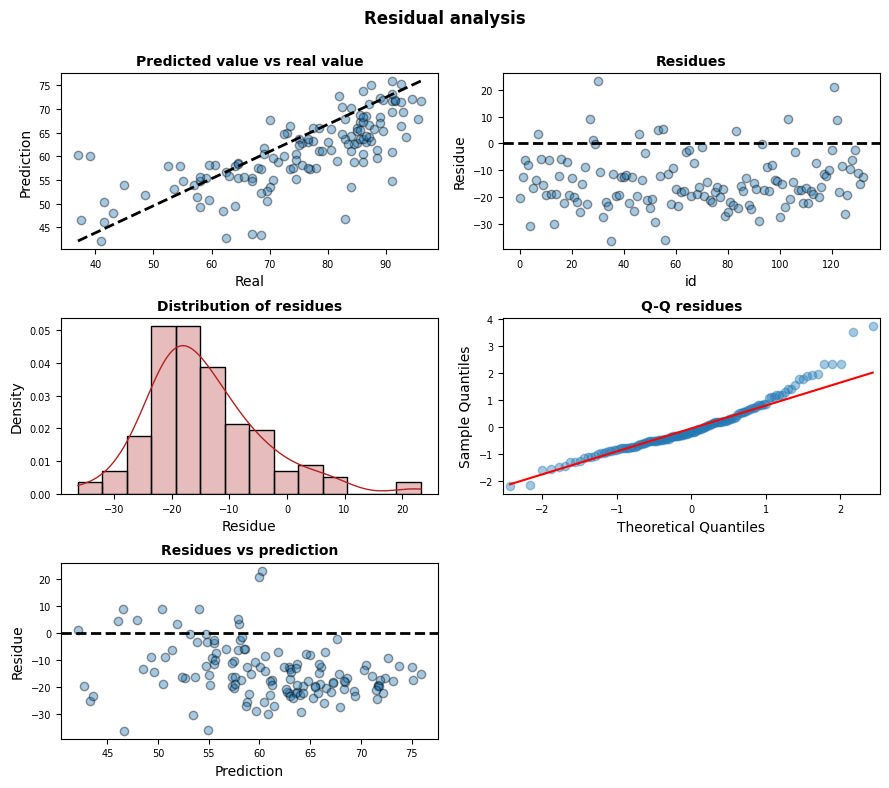

In [98]:
# Graphs
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediction_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [prediction_train.min(), prediction_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Predicted value vs real value', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Prediction')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residues_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residues', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residue')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residues_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribution of residues', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residue")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residues_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residues', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediction_train, residues_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residues vs prediction', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Prediction')
axes[2, 0].set_ylabel('Residue')
axes[2, 0].tick_params(labelsize = 7)

# Eliminate empty axes
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Residual analysis', fontsize = 12, fontweight = "bold");

### Normality test

We now verify if the residues follow a normal distribution using to statistical tests: *Shapiro-Wilk test* and *D'Agostino's K-squared test*. The latter includes a summary from **Statsmodels** with the name *Omnibus*.

On both tests, the null hypothesis considers that the data follows a normal distribution. Hence, if the *$p$-value* is not smaller than the selected significance level *alpha* there is no evidence to reject the statement that the data is normally distributed.

In [99]:
# Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(residues_train)
shapiro_test

ShapiroResult(statistic=0.9468483286776072, pvalue=5.370854145186109e-05)

In [100]:
# D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(residues_train)
print(f"Statistic= {k2}, p-value = {p_value}")

Statistic= 24.62648370596481, p-value = 4.491868243063033e-06


The $p$-values obtained on either of the tests is much smaller than $0.05$, and therefore there is enough evidence for rejecting the null hypothesis that the residues are not normally distributed.

## Predictions

Now that we have trained our model, we can obtain predictions for new data. Models from **statsmodels** allow us to calculate predictions in two ways:

- `.predict()`: only gives predicted values.

- `.get_prediction().summary_frame()`: gives confidence intervals in addition to predicted values.

In [101]:
# Predictions with 95% confidence intervals
# ==============================================================================
predictions = modelf_noint.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predictions.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,66.558570,3.765789,59.107865,74.009275,46.838620,86.278519
1,62.883837,3.563626,55.833115,69.934559,43.311508,82.456166
2,51.340325,3.229653,44.950377,57.730274,31.996209,70.684442
3,64.998766,3.856590,57.368408,72.629124,45.210240,84.787292


## Model error test

In [102]:
# Model error test
# ==============================================================================
#X_test = sm.add_constant(X_test, prepend=False)
predictions = modelf_noint.predict(exog = X_test[list(X_train.columns)])
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predictions
       )
print("")
print(f"The test error (rmse) is: {rmse}")


The test error (rmse) is: 251.3732056129404


In [103]:
movies['Fans'].min(),movies['Fans'].mean(),movies['Fans'].max()

(37.0, 74.40119760479043, 96.0)

In [104]:
modelf_noint.params

Duration   -0.082631
Budget      0.032218
Imdb        0.908349
Critic_4    0.237838
dtype: float64

## Interpreting the results

So, the linear model thus generated follows the equation:

$$
Fans = 0.034400 Year -0.127539 Duration + 0.005470 Revenue + 0.324520 Imdb
$$

`R-squared` indicates that the model is able to explain 99% of the observerd variability for the response variable. Furthermore, the *$p$-value* obtained in the F-test (`Prob (F-statistic) = 7.05e-152`) indicates that there is sufficient evidence that the variance explained by the model is greater than that of random chance.

For each increment in any of the predictor variables, the rating of the fans increases by 6.32 **on average**

## Making a prediction

Now, we will use our model to predict the rating of a movie that is not in the data frame.

In [105]:
titles = movies.index.values.tolist()
titles

['A quiet place',
 'A quiet place Part II',
 'Aladin (2019)',
 'Alice in Wonderland',
 'American Psycho',
 'Anyone but you',
 'Astro boy',
 'Baby Driver',
 'Bambi',
 'Barbie',
 'Bay Watch',
 'Beauty and the Beast',
 'Big Hero 6',
 'Black Adam',
 'Bohemian Rhapsody',
 'Bolt',
 'Bruce Almighty',
 'Bullet Train',
 'Candyman',
 'Cars',
 'Cars 2',
 'Cars 3',
 'Catch me if you can',
 'Chicken Little',
 'Click',
 'Coco',
 'Coraline',
 'Creed',
 'Creed 2',
 'Creed 3',
 'Cronos',
 'Dont breathe',
 'Dont breathe 2',
 'Dont look up',
 'Dragon Ball Z: Battle of the  Gods',
 'Due Date',
 'Dumb and Dumber',
 'Dune',
 'Earthquake: the San Andreas Fault',
 'Elvis',
 'Encanto',
 'Enders game',
 'F9',
 'Fast and Furious',
 'Fast and Furious 6',
 'Fast Five',
 'Fight club',
 'Finding Nemo',
 'Five Feet Apart',
 'Five Nights at Freddy´s',
 'Ford v Ferrari',
 'Forrest gump',
 'Free Guy',
 'Friday 13th',
 'Frozen',
 'Frozen 2',
 'Furious 7',
 'G-Force',
 'Get Out',
 'Gladiator',
 'Gran Turismo',
 'Happy Dea

In [106]:
'Monty Python and the Holy Grail'.capitalize()

'Monty python and the holy grail'

In [107]:
'Ben hur' in titles or 'Ben-hur' in titles or 'Ben-Hur' in titles or 'Monty Python and the Holy Grail'.capitalize() in titles or "You've got mail" in titles

False

In [108]:
modelf_noint.params

Duration   -0.082631
Budget      0.032218
Imdb        0.908349
Critic_4    0.237838
dtype: float64

In [109]:
favorites = pd.DataFrame({'Year':[1959, 1975, 1998], 'Duration':[212,91,119], 'Imdb':[81, 82, 67], 'Revenue':[74.437981,2.817496,250.821575]},index=['Ben-Hur','Monty Python and the Holy Grail',"You've got mail"])
favorites

,Year,Duration,Imdb,Revenue
Ben-Hur,1959,212,81,74.437981
Monty Python and the Holy Grail,1975,91,82,2.817496
You've got mail,1998,119,67,250.821575


In [110]:
modelf_noint.predict(exog = favorites)

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'Budget' is not defined
    Fans ~ 0 + Duration + Budget + Imdb + Critic_4
                          ^^^^^^